# １、目標：アメリカの株式市場からポートフォリオを組み、3ヶ月の短期投資をシミュレーションし、その実際の収益を平均分散モデルとブラックリッターマンモデル、の二つモデルで比較して、評価する。学習期間を2012年10月1日から2019年9月12日までにします。シミュレーション期間は2019年9月13日から2019年12月13日までにします。銘柄を20にします。

In [44]:
#シミュレーション期間
datetime.datetime(2019, 12, 13)-datetime.datetime(2019, 9, 13)

datetime.timedelta(days=91)

## （１）外部の情報としては、まず無リスク金利とマーケットプライスを知る必要がある。無リスク金利として、13 Week Treasury Bill (^IRX)を使って測る。

In [45]:
#13 Week Treasury Billの情報をダウンロード
import pandas_datareader as pdr
import datetime
IRX = pdr.get_data_yahoo('^IRX', 
                          start=datetime.datetime(2019, 9, 12), 
                          end=datetime.datetime(2019, 9, 12))

In [46]:
IRX

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-11,1.913,1.913,1.913,1.913,0,1.913
2019-09-12,1.900,1.878,1.888,1.895,0,1.895


In [47]:
week_13_rate=IRX["Adj Close"][1]

In [48]:
print(week_13_rate)

1.8949999809265137


# （２）一年未満のゼロクーポン債の計算式  
## r = [(F-P)/F]*[365/M]
## F=債券の額面価値  
## m＝債券の満期の日数
## P=債券の価格  
## r=債券の利回り 

## [(F-P)/F]=3ヶ月の無リスク金利（risk_free）と定義し

In [49]:
risk_free=(week_13_rate/100)/(365/(13*7))

In [50]:
risk_free

0.00472452050039213

## ゼロクーポン債だから、国債の利回り＝3ヶ月のスポットレートになる。3ヶ月の投資だから、この債券に1ドル投資すれば、3ヶ月後ほぼ確実に1.00472の資産が手に入る。これを安全資産と定義され、この安全資産の金利を無リスク金利にする。

## (３)選択した銘柄だダウンロード

In [51]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm



AAPLE = pdr.get_data_yahoo('AAPL', start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))

GOOGLE = pdr.get_data_yahoo('GOOGL', start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))

McDonalds = pdr.get_data_yahoo('MCD',start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))

GM = pdr.get_data_yahoo('GM', start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))



XOM = pdr.get_data_yahoo('XOM', start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
BRK = pdr.get_data_yahoo('BRK-A', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
MSFT = pdr.get_data_yahoo('MSFT', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
WFC = pdr.get_data_yahoo('WFC', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))


AMZN = pdr.get_data_yahoo('AMZN', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
FB = pdr.get_data_yahoo('FB', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
JPM = pdr.get_data_yahoo('JPM', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
VISA = pdr.get_data_yahoo('V', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))


WMT = pdr.get_data_yahoo('WMT', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
MA = pdr.get_data_yahoo('MA', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
PG = pdr.get_data_yahoo('PG', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
BAC= pdr.get_data_yahoo('BAC', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))


ATT = pdr.get_data_yahoo('T',start=datetime.datetime(2012, 10, 1),
                          end=datetime.datetime(2019, 9, 12))

Intel = pdr.get_data_yahoo('INTC', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
UnitedHealth_Group = pdr.get_data_yahoo('UNH', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))
The_Walt_Disney = pdr.get_data_yahoo('DIS', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))


In [52]:
data=pd.concat([AAPLE[["Close"]],GOOGLE[["Close"]],McDonalds[["Close"]],GM[["Close"]],
               XOM[["Close"]],BRK[["Close"]],MSFT[["Close"]],WFC[["Close"]],
                AMZN[["Close"]],FB[["Close"]],JPM[["Close"]],VISA[["Close"]],
                WMT[["Close"]],MA[["Close"]],PG[["Close"]],BAC[["Close"]],
                ATT[["Close"]],Intel[["Close"]],UnitedHealth_Group[["Close"]],The_Walt_Disney[["Close"]]],axis=1)
data.columns=["APPLE","GOOGLE","McDonalds","GM","XOM","BRK","MSFT","WFC","AMZN","FB","JPM","VISA",
             "WMT","MA","PG","BAC","ATT","Intel","UnitedHealth_Group","The_Walt_Disney"]

## （４）時系列推移と収益率をプロット

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


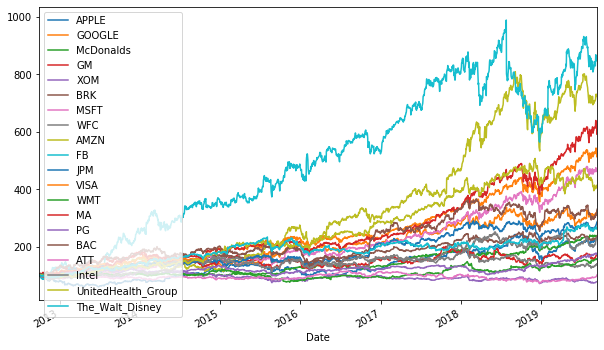

In [53]:
(data / data.ix[0] * 100).plot(figsize=(10, 6))

In [54]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,APPLE,GOOGLE,McDonalds,GM,XOM,BRK,MSFT,WFC,AMZN,FB,JPM,VISA,WMT,MA,PG,BAC,ATT,Intel,UnitedHealth_Group,The_Walt_Disney
Date,,,,,,,,,,,,,,,,,,,,
2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-02,0.002908,-0.006308,-0.011590,0.025231,-0.000872,0.001705,0.005748,0.003452,-0.005611,0.012653,-0.001221,-0.005353,-0.004060,0.001662,-0.009549,-0.003354,0.001588,0.003509,0.006004,-0.008292
2012-10-03,0.015217,0.007252,-0.006399,0.029542,-0.000218,0.006270,0.006720,0.017649,0.021007,-0.019955,-0.001467,0.018360,0.006083,0.034596,0.005509,0.019956,0.009476,-0.012778,0.001056,0.015945
2012-10-04,-0.006949,0.007252,0.007498,0.010604,0.005655,0.009029,0.005677,0.014844,0.017623,0.005482,0.023223,0.008268,0.006984,0.002361,0.003031,0.032400,0.004444,-0.003554,0.019334,0.003045
2012-10-05,-0.021541,-0.000521,-0.000330,0.006067,0.003572,0.002023,-0.006012,-0.003621,-0.007553,-0.048540,-0.002634,0.004215,0.005472,0.000821,0.003597,-0.009610,-0.012599,0.009302,-0.014596,0.006439


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26295850>,
      dtype=object)

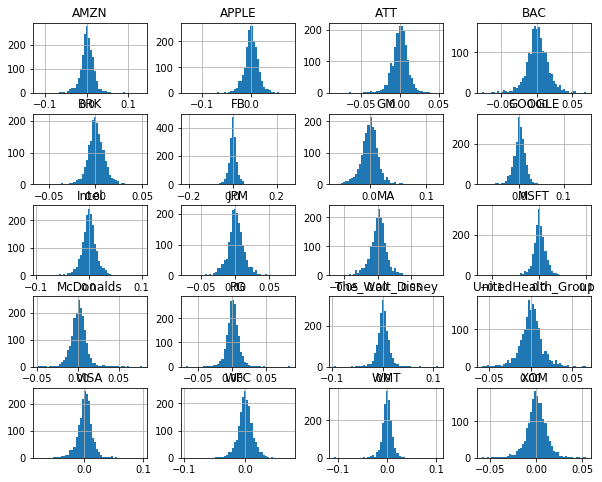

In [55]:
log_returns.hist(bins=50, figsize=(10, 8))

# ２、平均分散モデル
## （１）モデル最適化

In [56]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data,frequency=252)

#最小分散ポートフォリオ
EF_min = EfficientFrontier(mu, S)
#最小分散ポートフォリオを計算する
EF_min.min_volatility()
#ポートフォリオの年リターン、ボラティリティ、シャープ・レシオを求める
EF_min.portfolio_performance(verbose=True)

Expected annual return: 9.9%
Annual volatility: 11.1%
Sharpe Ratio: 0.72


(0.09947133480839099, 0.1110362140811254, 0.7157244640052978)

In [57]:
#CAPM理論に基づき、平均分散モデルを最適化
#無リスク金利を入れる
EF = EfficientFrontier(mu, S)
weights = EF.max_sharpe(risk_free_rate=risk_free)
#ポートフォリオの年リターン、ボラティリティ、シャープ・レシオを求める
EF.portfolio_performance(verbose=True)

Expected annual return: 25.6%
Annual volatility: 16.1%
Sharpe Ratio: 1.47


(0.25629578392307684, 0.16095539727467276, 1.4680823875687412)

In [58]:
#各ウェイトをプリントする
EF.clean_weights()

{'APPLE': 0.0,
 'GOOGLE': 0.0,
 'McDonalds': 0.14861,
 'GM': 0.0,
 'XOM': 0.0,
 'BRK': 0.0,
 'MSFT': 0.06315,
 'WFC': 0.0,
 'AMZN': 0.08925,
 'FB': 0.14087,
 'JPM': 0.0,
 'VISA': 0.11418,
 'WMT': 0.0,
 'MA': 0.18859,
 'PG': 0.0,
 'BAC': 0.0,
 'ATT': 0.0,
 'Intel': 0.0,
 'UnitedHealth_Group': 0.24175,
 'The_Walt_Disney': 0.01359}

## （２）シミュレーションのために、各銘柄の2019年9月13日から2020年1月10日までのデータを取る

In [62]:
AAPLE = pdr.get_data_yahoo('AAPL', start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))

GOOGLE = pdr.get_data_yahoo('GOOGL', start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))

McDonalds = pdr.get_data_yahoo('MCD',start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))

GM = pdr.get_data_yahoo('GM', start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))



XOM = pdr.get_data_yahoo('XOM', start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
BRK = pdr.get_data_yahoo('BRK-A', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
MSFT = pdr.get_data_yahoo('MSFT', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
WFC = pdr.get_data_yahoo('WFC', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))


AMZN = pdr.get_data_yahoo('AMZN', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
FB = pdr.get_data_yahoo('FB', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
JPM = pdr.get_data_yahoo('JPM', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
VISA = pdr.get_data_yahoo('V', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))


WMT = pdr.get_data_yahoo('WMT', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
MA = pdr.get_data_yahoo('MA', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
PG = pdr.get_data_yahoo('PG', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
BAC= pdr.get_data_yahoo('BAC', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))

ATT = pdr.get_data_yahoo('T',start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))

Intel = pdr.get_data_yahoo('INTC', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
UnitedHealth_Group = pdr.get_data_yahoo('UNH', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))
The_Walt_Disney = pdr.get_data_yahoo('DIS', 
                          start=datetime.datetime(2019, 9, 13), 
                          end=datetime.datetime(2019, 12, 13))



In [63]:
data2=pd.concat([AAPLE[["Close"]],GOOGLE[["Close"]],McDonalds[["Close"]],GM[["Close"]],
               XOM[["Close"]],BRK[["Close"]],MSFT[["Close"]],WFC[["Close"]],
                AMZN[["Close"]],FB[["Close"]],JPM[["Close"]],VISA[["Close"]],
                WMT[["Close"]],MA[["Close"]],PG[["Close"]],BAC[["Close"]],
                ATT[["Close"]],Intel[["Close"]],UnitedHealth_Group[["Close"]],The_Walt_Disney[["Close"]]],axis=1)
data2.columns=["APPLE","GOOGLE","McDonalds","GM","XOM","BRK","MSFT","WFC","AMZN","FB","JPM","VISA",
             "WMT","MA","PG","BAC","ATT","Intel","UnitedHealth_Group","The_Walt_Disney"]

## （３）2019年9月13日から2020年1月10日まで運用したらポートフォリオの平均収益は  
## R=1r1+w2r2+...+wn*rn  
## ri=個々の銘柄のリターン  
## wi=個々の銘柄のウェイト  
## R=ポートフォリオの平均収益  

In [64]:
Mean_variance_return=np.sum(np.array(EF.weights)*np.array(expected_returns.mean_historical_return(data2, frequency=252)))

In [65]:
Mean_variance_return

0.28325740772161173

平均分散モデルポートフォリオのリターンは28.33パーセントです。

## （４）平均分散モデルポートフォリオのボラティリティ

In [66]:
from pypfopt import objective_functions
objective_functions.volatility(EF.weights, risk_models.sample_cov(data2))

0.015084565443682462

# ３、ブラック–リッターマンモデル

## （１）シミュレーション期間、2019年9月13日から2020年1月10日までの各銘柄のリターンを算出

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


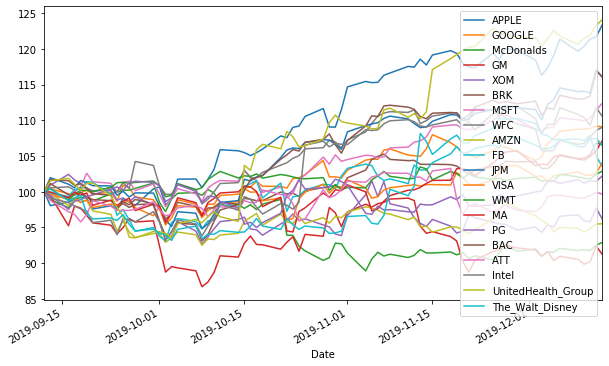

In [67]:
(data2 / data2.ix[0] * 100).plot(figsize=(10, 6))

In [68]:
expected_returns.mean_historical_return(data2, frequency=252)

APPLE                 0.832065
GOOGLE                0.348170
McDonalds            -0.268498
GM                   -0.320787
XOM                  -0.129530
BRK                   0.253862
MSFT                  0.463889
WFC                   0.404547
AMZN                 -0.166396
FB                    0.156823
JPM                   0.591384
VISA                  0.166347
WMT                   0.116020
MA                    0.286967
PG                    0.098289
BAC                   0.595080
ATT                   0.004353
Intel                 0.361974
UnitedHealth_Group    0.868193
The_Walt_Disney       0.266744
dtype: float64

## （３）銘柄ごとの評論家レビューの設定  
以上の図とデータを参考すると、  
例えば、ある評論家は、3ヶ月以降、アップル、ユナイテッドヘルス・グループ、グーグル、マイクロソフト、フェイスブック、バンク・オブ・アメリカとJPモルガンの株はそれぞれ、80、80、40、50、20、50、50パーセント、に上がると予測し、他の銘柄は未知だとします。そうすると、ブラックリッターマンモデルを利用し、以下のように設定する

In [85]:
from pypfopt.black_litterman import BlackLittermanModel
S = risk_models.sample_cov(data)

viewdict = {"APPLE": 0.8,
           "UnitedHealth_Group": 0.8, "GOOGLE": \
            0.4,"MSFT": 0.5,"FB": 0.2,"JPM": 0.5,"BAC": 0.5}

In [86]:
bl = BlackLittermanModel(S, absolute_views=viewdict)
rets = bl.bl_returns()

## (4)各銘柄のリターンを計算する

In [87]:
rets

APPLE                 0.512259
GOOGLE                0.361131
McDonalds             0.168987
GM                    0.323445
XOM                   0.244177
BRK                   0.271389
MSFT                  0.409135
WFC                   0.329725
AMZN                  0.388936
FB                    0.291351
JPM                   0.391505
VISA                  0.327071
WMT                   0.175857
MA                    0.360920
PG                    0.153269
BAC                   0.446739
ATT                   0.171528
Intel                 0.335857
UnitedHealth_Group    0.482233
The_Walt_Disney       0.253857
dtype: float64

## （５）市場価格としてSP500を導入する

In [88]:
SP500 = pdr.get_data_yahoo('^GSPC', 
                          start=datetime.datetime(2012, 10, 1), 
                          end=datetime.datetime(2019, 9, 12))

In [89]:
market_prices=SP500["Close"]

## （６）同じくシミュレーション期間を2012年10月1日から2019年9月12日までにします。

In [90]:
from pypfopt import black_litterman

delta = black_litterman.market_implied_risk_aversion(market_prices,risk_free_rate=risk_free)

ef = EfficientFrontier(rets, S)

bl.bl_weights(delta)
weights = bl.clean_weights()

In [91]:
bl.portfolio_performance(verbose=True)

Expected annual return: 47.1%
Annual volatility: 17.0%
Sharpe Ratio: 2.65


(0.47055977153357387, 0.16978172177725878, 2.6537589960636363)

In [92]:
weights

{'APPLE': 0.26335,
 'GOOGLE': 0.04253,
 'McDonalds': 0.0,
 'GM': 0.0,
 'XOM': 0.0,
 'BRK': 0.0,
 'MSFT': 0.10156,
 'WFC': 0.0,
 'AMZN': 0.0,
 'FB': -0.04642,
 'JPM': 0.15545,
 'VISA': 0.0,
 'WMT': 0.0,
 'MA': 0.0,
 'PG': 0.0,
 'BAC': 0.0497,
 'ATT': 0.0,
 'Intel': 0.0,
 'UnitedHealth_Group': 0.43384,
 'The_Walt_Disney': 0.0}

In [93]:
sum(weights.values())

1.00001

## （７）2019年9月13日から2020年1月10日まで運用したらポートフォリオの平均収益は  
## R=1r1+w2r2+...+wn*rn
## ri=個々の銘柄のリターン
## wi=個々の銘柄のウェイト
## R=ポートフォリオの平均収益

In [94]:
BL_return=np.sum(np.array(bl.weights)*np.array(expected_returns.mean_historical_return(data2, frequency=252)))

In [95]:
BL_return

0.7719222516287404

## （８）ポートフォリオのボラティリティ 

In [96]:
from pypfopt import objective_functions
objective_functions.volatility(bl.weights, risk_models.sample_cov(data2))

0.022826362120934807

## ブラックリッターマンモデルのリターンは、73.67パーセントになりました、

# ４、ポートフォリオの比較

## （１）ポートフォリオウェイトの比較

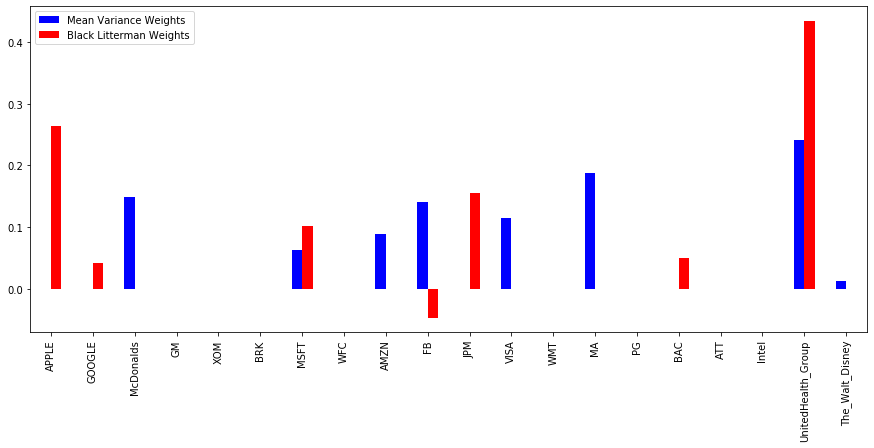

In [119]:
df = pd.DataFrame([EF.weights.reshape(20),np.array(list(bl.weights)).reshape(20)],
                  columns=["APPLE","GOOGLE","McDonalds","GM","XOM","BRK","MSFT","WFC","AMZN","FB","JPM","VISA",
             "WMT","MA","PG","BAC","ATT","Intel","UnitedHealth_Group","The_Walt_Disney"],
                  index=['Mean Variance Weights','Black Litterman Weights'])
df.T.plot(kind='bar', color='br',figsize=(15, 6))

## （２）分析
## 青がもともとの株のウェイト、赤が新しく計算された、投資家のビューを組み入れたポートフォリオウェイトを表しています。アップル、グールル、JPモルガン、ユナイテッドヘルス・グループなどの株が上がるという情報が入ったことから、ブラックリッターマンモデルで、ウェイトが新しく算出されました。

## （３）シミュレーションしたポートフォリオ収益率、ボラティリティの比較

In [120]:
df2 = pd.DataFrame([[objective_functions.volatility(EF.weights, risk_models.sample_cov(data2)),\
                    objective_functions.volatility(bl.weights, risk_models.sample_cov(data2))
                    ],[Mean_variance_return,BL_return]],columns=["平均分散モデル","ブラックリッターマンモデル"],index=["ボラティリティ","収益率"])
    
df2  

,平均分散モデル,ブラックリッターマンモデル
ボラティリティ,0.015085,0.022826
収益率,0.283257,0.771922


# ５、結論
## 2019年9月13日から2020年1月10日まで運用で、平均分散モデルと、ブラックリッターマンモデルを比較して、ポートフォリオの平均収益を求めた結果、ブラックリッターマンモデルを取り入れることで、ボラティリティがわずか、0.8パーセント上がり、ブラックリッターマンモデルの収益率が平均分散モデルよりも49%まであげることができた結果になりました。関係研究論文を読めば、結果としては当たり前のようになりますが、他人より優れた情報を持つと信じる人は、市場平均のポートフォリオ以上に高い成績を収めることを示唆しています。ポートフォリオ運用は、アルゴリズムだけでなく、評論家の情報や市場の情報、そして何よりも企業分析をきちんと行うことが大事だと思われます。

# ６、参考文献リスト
## 参考文献、デービッド・G・ ルーエンバーガー 今野浩・鈴木賢一・枇々木規雄訳『金融工学入門　第2版』 日本経済新聞社（２０１５）
## 参考文献、小松高広　『最適投資戦略』 朝倉書店（２０１８）
## 参考文献、PyPortfolioOpt、https://pyportfolioopt.readthedocs.io/en/latest/